In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# What you will learn today:
We will introduce **scikit-learn**, one of the most important tool to know in Machine Learning. We will see different cool features that allow us to tackle machine learning problems in an easily-codable way. 

We will implement KNN (that we saw in the last exercise) with scikit-learn and  see that it will be just few lin of codes. We will look at the train and test error as a function of the "complexity" of the model, we will discuss the fundamental Bias-Variance trade-off.
Finally we introduce then the Ensemble methods (Bagging and Boosting) and we analyze the performance of random forest in detail. 

# Introduction to Scikit-Learn: Machine Learning with Python

This section was put together by following the amazing work of [Jake Vanderplas](http://www.vanderplas.com). Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_tutorial/).</i></small>

This session will cover the basics of Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org.

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

For this short introduction, I'm going to stick to questions of in-core processing of small to medium datasets with Scikit-learn.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

# Basic Principles of Machine Learning

Here we'll dive into the basic principles of machine learning, and how to
utilize them via the Scikit-Learn API.

After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems, and **unsupervised learning**, including *dimensinoality reduction* and *clustering* problems.

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [41]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [42]:
model = LinearRegression()
print(model)

LinearRegression()


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [43]:
x = np.arange(10)
y = 2 * x + 1

In [44]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


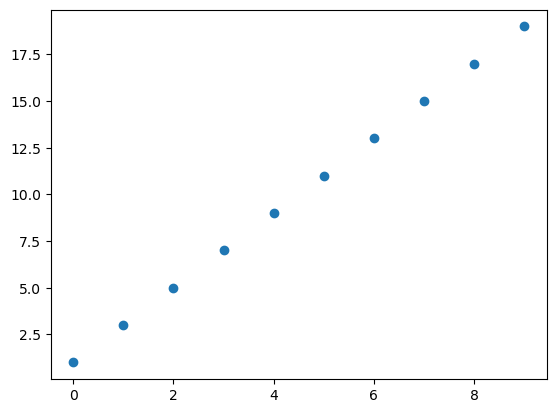

In [45]:
plt.plot(x, y, 'o');

In [46]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [47]:
# fit the model on our data
model.fit(X, y)

LinearRegression()

In [48]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
1.0000000000000053


The model found a line with a slope 2 and intercept 1, as we'd expect.

## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

---

### Regression Example

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

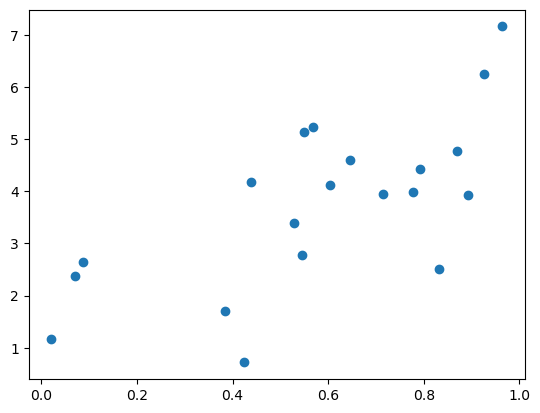

In [49]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

As above, we can plot a line of best fit:

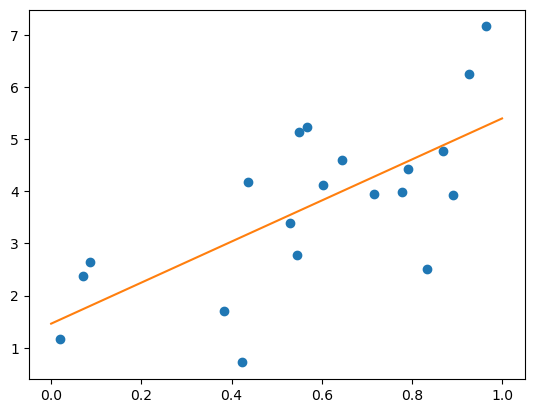

In [50]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

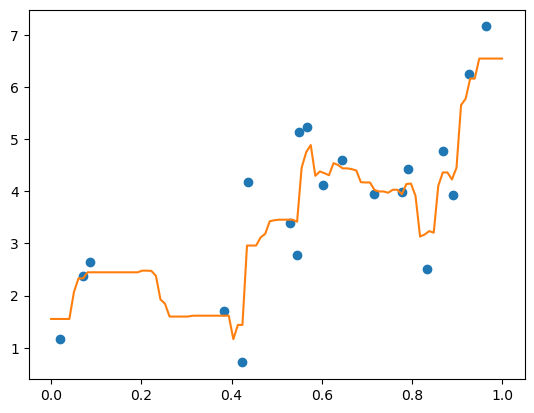

In [51]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)

Whether either of these is a "good" fit or not depends on a number of things; we'll discuss details of how to choose a model later in the tutorial.

**Classification example**

Generate data from the GMM introduced in TP3 and try to implement your first classification algorithm using scikit-learn! No worries if you do not manage. The exercise has the main purpose to let you familiarize with the browsing on the internet and to understand how to tackle a practical task. 


*Hint*: Search for sklearn.neighbors

So let's see how scikit-learn's k-NN implementation works. One nice thing about scikit-learn is that they have lots of examples available online, so we can just look for something similar to what we are trying to do. For k-NN classification in particular there's this: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

KNeighborsClassifier(n_neighbors=10)

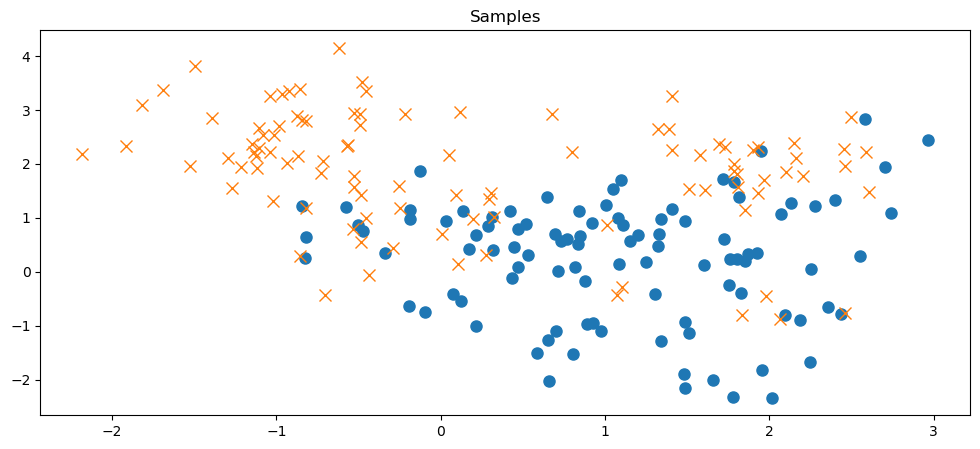

In [52]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(10)
# Samples 10 centroids for each class from two different bivariate Normal distributions
centroids_per_class = 10

class0_centroids = [1, 0] + np.random.randn(centroids_per_class, 2)
class1_centroids = [0, 1] + np.random.randn(centroids_per_class, 2)
samples_per_class = 100

# Sample actual data sampling from Normal distributions positioned around the centroids (Pick the centroid of the chosen class uniformly)
class0_labels = np.random.randint(10, size = samples_per_class)
class1_labels = np.random.randint(10, size = samples_per_class)

class0_samples = class0_centroids[class0_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2)
class1_samples = class1_centroids[class1_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2)

# Plot data
plt.figure(figsize=((12,5)))
plt.plot(class0_samples[:, 0], class0_samples[:, 1], "o", markersize=8)
plt.plot(class1_samples[:, 0], class1_samples[:, 1], "x", markersize=8)
plt.title("Samples")
X = np.vstack((class0_samples, class1_samples))
y = np.hstack((np.zeros(samples_per_class), np.ones(samples_per_class)))
clf.fit(X, y)

And done! With just three lines of code we were able to repeat everything we've been doing so far.

 Let us see if we get the same training error as before.

In [53]:
# Sample test data from the model
testsamples_per_class = 10000

class0_testlabels = np.random.randint(10, size = testsamples_per_class)
class1_testlabels = np.random.randint(10, size = testsamples_per_class)
class0_testsamples = class0_centroids[class0_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)
class1_testsamples = class1_centroids[class1_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)

X_test = np.vstack((class0_testsamples, class1_testsamples))
y_test = np.hstack((np.zeros(testsamples_per_class), np.ones(testsamples_per_class)))

In [54]:
train_error = np.mean(y != clf.predict(X))
test_error = np.mean(y_test != clf.predict(X_test))

print("train/test error (for k = 10): %g/%g" % (train_error, test_error))

train/test error (for k = 10): 0.16/0.21715


We could use also the *.score* method

In [55]:
train_error = 1. - clf.score(X, y)
test_error = 1. - clf.score(X_test, y_test)

print("train/test error (for k = 10): %g/%g" % (train_error, test_error))

train/test error (for k = 10): 0.16/0.21715


Since things are optimized here, we can even do cool things such as plotting the actual decision boundaries. 

In order to do that, let us generate a grid and compute the estimate for each point in that grid.

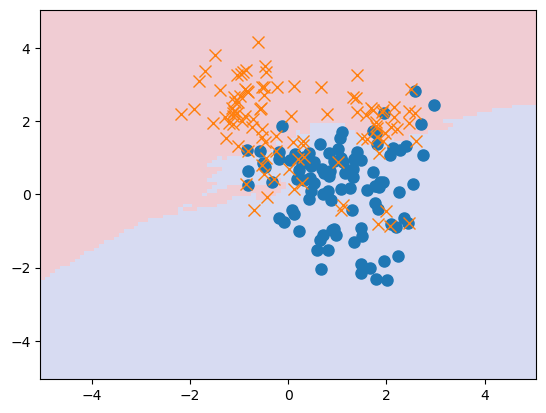

In [56]:
# Create a grid
xx, yy = np.meshgrid(np.linspace(-5, 5, 101), np.linspace(-5, 5, 101))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Do some plotting
zz = zz.reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap = "coolwarm", alpha = 0.2)
plt.plot(X[y == 0, 0], X[y == 0, 1], "o", markersize=8)
plt.plot(X[y == 1, 0], X[y == 1, 1], "x", markersize=8)

...scikit-learn is a beautiful piace of engineering!

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### Determining the best value of $k$ by cross-validation

Let us introduce a way to pinpoint the "best" value of $k$, called **cross-validation**.
The main idea is to partition our dataset into two called *training* and *validation* sets. 

We can pinpoint the optimal $k$ so as to minimize the validation error.


**Caveat**: We then need a 3rd set where we can compute the test error -- **NEVER** adjust your parameters and compute the test error using the same set!

However, this does not provide us good statistics since the partitioning is only done once; a perhaps better way of doing it is by partitioning the dataset again and again, and recomputing the score. 

This is the idea behind cross-validation and scikit-learn has nice convenience functions to perform cross-validation for us.

In [57]:
from sklearn.model_selection import GridSearchCV

# Set up the grid search
parameters = [{'n_neighbors': np.arange(1, 20)}]
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(),
     parameters
     )
clf.fit(X, y)

# Print results
print(clf.best_params_)
print(clf.cv_results_["mean_test_score"])

{'n_neighbors': 16}
[0.75  0.77  0.78  0.78  0.8   0.805 0.815 0.8   0.795 0.815 0.815 0.815
 0.81  0.81  0.82  0.825 0.81  0.815 0.805]


Let's see how this does on the test set.

In [58]:
train_error = np.mean(y != clf.predict(X))
test_error = np.mean(y_test != clf.predict(X_test))
print("train/test error (for optimal k): %g/%g" % (train_error, test_error))

train/test error (for optimal k): 0.17/0.22435


## Flow Chart: How to Choose your Estimator

[There](https://scikit-learn.org/stable/machine_learning_map.html) is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

# Bias-Variance Trade-off 

We analyze in this section one key idea of Machine Learning: the Bias-Variance trade-off. First we see it with KNN, our dear friend by now. Then we go forward and we study the Random Forest case. 


### KNN 

Let us rewrite briefly the code for generating the GMM dataset of TP3.

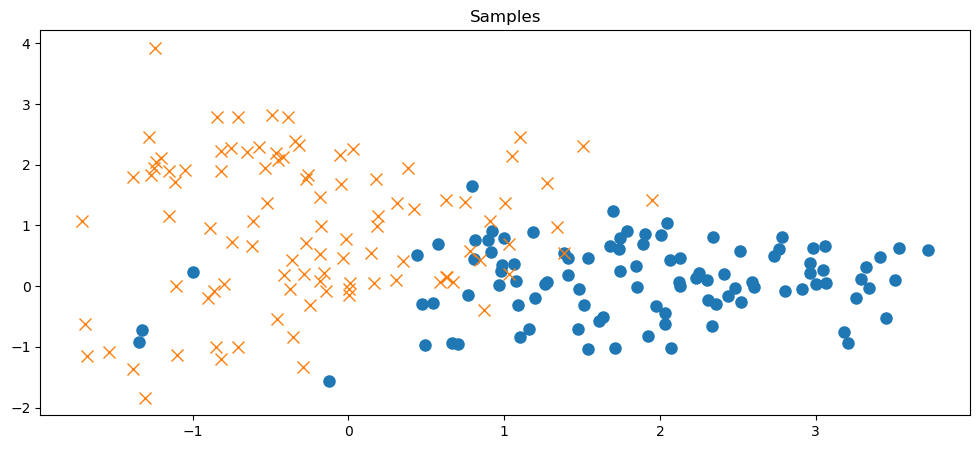

In [59]:
# Samples 10 centroids for each class from two different bivariate Normal distributions
centroids_per_class = 10

class0_centroids = [1, 0] + np.random.randn(centroids_per_class, 2)
class1_centroids = [0, 1] + np.random.randn(centroids_per_class, 2)
samples_per_class = 100

# Sample actual data sampling from Normal distributions positioned around the centroids (Pick the centroid of the chosen class uniformly)
class0_labels = np.random.randint(10, size = samples_per_class)
class1_labels = np.random.randint(10, size = samples_per_class)

class0_samples = class0_centroids[class0_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2)
class1_samples = class1_centroids[class1_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2)

# Plot data
plt.figure(figsize=((12,5)))
plt.plot(class0_samples[:, 0], class0_samples[:, 1], "o", markersize=8)
plt.plot(class1_samples[:, 0], class1_samples[:, 1], "x", markersize=8)
plt.title("Samples")
X = np.vstack((class0_samples, class1_samples))
y = np.hstack((np.zeros(samples_per_class), np.ones(samples_per_class)))

In [60]:
# Sample test data from the model
testsamples_per_class = 10000

class0_testlabels = np.random.randint(10, size = testsamples_per_class)
class1_testlabels = np.random.randint(10, size = testsamples_per_class)
class0_testsamples = class0_centroids[class0_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)
class1_testsamples = class1_centroids[class1_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)

X_test = np.vstack((class0_testsamples, class1_testsamples))
y_test = np.hstack((np.zeros(testsamples_per_class), np.ones(testsamples_per_class)))

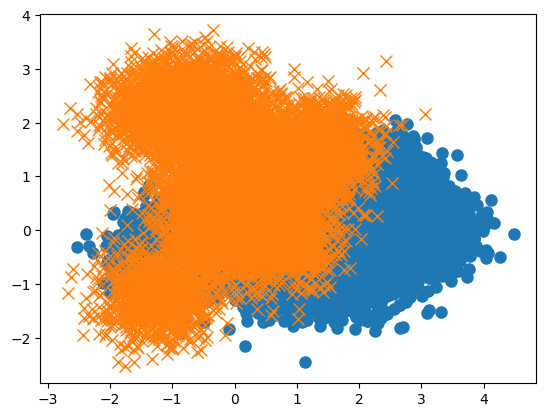

In [61]:
# Plot test data
plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], "o", ms=8)
plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], "x", ms=8)

We can write easily a function that computes the train and test error of KNN using sklearn.

In [62]:
from sklearn import neighbors
def knn_errors(X_train, y_train, X_test, y_test, k):
    n_train, n_test = len(y_train), len(y_test)
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    
    train_error = np.mean(y != clf.predict(X))
    test_error = np.mean(y_test != clf.predict(X_test))

    # Or use the score method 
    train_error = 1. - clf.score(X, y)
    test_error = 1. - clf.score(X_test, y_test)

    return train_error,test_error

It is instructive to look at the dependence of the error as a function of another quantity instead of $k$: the number of **degrees of freedom** $N / k$. 

Indeed, the larger the $k$, the smaller the number of effective parameters -- think for instance of the $k = N$ limit, where everyone is assigned the same label.

k = 1; train error = 0, test error = 0.181
k = 2; train error = 0.065, test error = 0.1809
k = 3; train error = 0.07, test error = 0.15455
k = 4; train error = 0.065, test error = 0.158
k = 5; train error = 0.08, test error = 0.1536
k = 6; train error = 0.07, test error = 0.1568
k = 7; train error = 0.09, test error = 0.15495
k = 8; train error = 0.09, test error = 0.15785
k = 9; train error = 0.09, test error = 0.15645
k = 10; train error = 0.085, test error = 0.15895
k = 40; train error = 0.12, test error = 0.1784
k = 70; train error = 0.105, test error = 0.1763
k = 100; train error = 0.105, test error = 0.17365
k = 130; train error = 0.105, test error = 0.182


Text(0, 0.5, 'misclassification error')

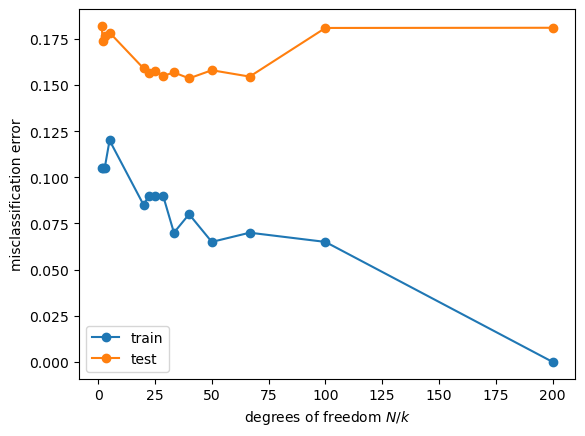

In [63]:
# Re-run the experiment above for a different range of values
ks = np.r_[np.arange(1, 10), np.arange(10, 150, 30)]
train_error = []
test_error = []
for k in ks:
    knn_errs = knn_errors(X, y, X_test, y_test,k)
    train_error.append(knn_errs[0])
    test_error.append(knn_errs[1])
    print("k = %d; train error = %g, test error = %g" % (k, train_error[-1], test_error[-1]))

# Plot error as a function of the degrees of freedom
plt.plot(len(y) / np.array(ks), train_error, "-o", label = "train")
plt.plot(len(y) / np.array(ks), test_error, "-o", label = "test")
plt.legend()
plt.xlabel(r"degrees of freedom $N / k$")
plt.ylabel("misclassification error")
#plt.ylim((0.025, 0.15))

This plot makes explicit the so-called **bias-variance tradeoff** that appears all throughout statistics. If we have more parameters, we are able to get smaller training error, but the test (analogously, generalization) error actually increases, meaning we are overfitting! 

Remember the pivotal difference between learning and memorizing!

# Linear regression on the Ozone dataset - Regression trees and random forest


## The Ozone dataset

Let's take a look at a particular real-life data problem: the prediction of ozone concentration as a factor of other weather-based features. As with all data problems, it behooves us to take a look at all of the information that we have about the dataset.


**Description**

These data record the level of atmospheric ozone concentration from
eight daily meteorological measurements made in the Los Angeles basin
in 1976.  Although measurements were made every day that year, some
observations were missing; here we have the 330 complete cases.  The
data were given to us by Leo Breiman; he was a consultant on a project
from which these data are taken.  The response, referred to as ozone,
is actually the log of the daily maximum of the hourly-average ozone
concentrations in Upland, California.

Source: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data

Detailed variable names:

- ozone : Upland Maximum Ozone
- vh : Vandenberg 500 mb Height
- wind : Wind Speed (mph)
- humidity : Humidity (%)
- temp : Sandburg AFB Temperature
- ibh : Inversion Base Height
- dpg : Daggot Pressure Gradient
- ibt : Inversion Base Temperature
- vis : Visibility (miles)
- doy : Day of the Year

Now let's take a look at what this dataset looks like. We have imported the datased into a pandas dataframe. See e.g. http://pythonhow.com/accessing-dataframe-columns-rows-and-cells/ for a short tutorial on dataframes.

In [64]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data')
print(f"data: {data.shape[0]} rows and {data.shape[1]} columns")
data.head()

data: 330 rows and 10 columns


,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


Alright, we're ready to get started ! Our dataset contains

$\bullet$ $N=330$ data points $x_i$, each containing $P=9$ meteorological features 

$\bullet$ one target $y_i$, the Ozone concentration

Now, before we touch anything, we need to follow best practices. When faced with a new dataset, we need to set up some kind of objective comparison. To do this, we need to split our dataset into three parts: **Training** (and within that, **Validation**), and **Testing** sets. 

The best practice here is to take the test data and lock it away somewhere. It is always tempting to tune your algorithms to give the best test performance. However, even if the regression isn't explicitly *trained* on the test data, as practitioners, we could be continually making changes in an effort to get our numbers up.

Instead, we should deep-freeze the test data, and then tune as much as we can via **cross-validation (CV)** on our training data.

In [65]:
from sklearn.model_selection import train_test_split, KFold

# Convert from DataFrame to array
y = data['ozone'].values
X = data.iloc[:,1:10].astype(float).values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print("Training samples: ", len(y_train))
print("Testing samples: ", len(y_test))

Training samples:  247
Testing samples:  83


Now, before we start attempting to fit models, lets take a bit of care and apply some pre-processing to our dataset. The de-facto pre-processing is *centering and normalization*. Specifically, many flavors of estimators (OLS, RR, etc.) can be thrown of by large differences in of scale and variations between the features. We can easily account for this in our estimators by simply normalizing the feature columns and removing averages. Scikit-Learn has some features for this.

In [66]:
from sklearn import preprocessing 

# Center and scale features and observations
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
ymean = np.mean(y_train)
y_train = y_train - ymean
y_test = y_test - ymean

Now it is time for us to choose our estimator. What should we choose? 

We will introduce **Regression Trees**, and on them we will apply the methods of **Bagging**.

# Evaluated Question 
## Regression trees

Now, we introduce regression trees. Regression trees are perhaps the simplest non-linear regression model one can imagine. The tree is constructed recursively. At each step, the training set is split in two parts according to a binary question ("Is feature $x_\mu < q$?"). The feature and the threshold are chosen to minimize a Loss function, e.g. Mean Square Error (MSE) or Mean Absolute Error (MAE).

Once the tree is constructed, for a new sample $x_{new}$, one simply determines in which leave it falls, and then assign the value $y_{new}$ as the mean (for MSE) or the median (for MAE) of the traning samples in that leave.

**Exercise**: Explore the Regression tree model implemented in scikit-learn. Regression trees (e.g. as implemented in sklearn) have many free parameters: the maximum depth of the tree, the minimum number of samples that should be contained in each split, the minimum number of samples in the leaves, etc. Perform CV for at least some of these parameters and discuss your results. 

See http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor for documentation, and references therein for more details on regression trees.


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### Max Depth

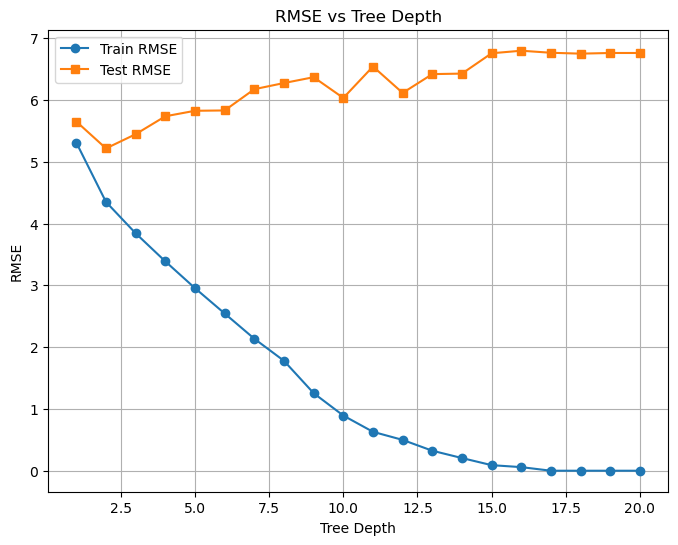

In [68]:
depths = range(1, 21)
rmse_train_depth = []
rmse_test_depth = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=1)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    rmse_train_depth.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test_depth.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plotting
plt.figure(figsize=(8,6))
plt.plot(depths, rmse_train_depth, label='Train RMSE', marker='o')
plt.plot(depths, rmse_test_depth, label='Test RMSE', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("RMSE")
plt.title("RMSE vs Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

The plot shows how the training and testing RMS errors vary with the tree depth. As expected, the training error consistently decreases with increasing depth, eventually approaching zero. This indicates that deeper trees fit the training data more closely, possibly even memorizing it. In contrast, the test error initially decreases slightly but then begins to increase beyond a certain depth, which is a clear sign of overfitting. The best generalization performance (lowest test error) is typically found at an intermediate depth, where the model achieves a good bias-variance tradeoff.

In [70]:
depth_scores = []
for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=0)
    neg_rmse = cross_val_score(model, X_train, y_train, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5)
    depth_scores.append(-np.mean(neg_rmse))  # convert to positive RMSE

best_depth = depths[np.argmin(depth_scores)]
print(f"Best max_depth: {best_depth}, RMSE: {min(depth_scores):.4f}")

Best max_depth: 3, RMSE: 4.8658


The CV shows that the optimal max_depth is 3, which is near the one shown on the graph for this specific train-test split.

### Min Sample Split

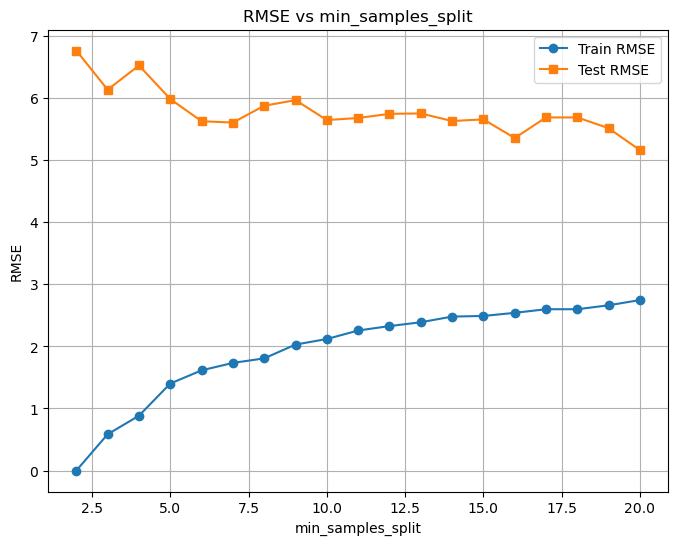

In [ ]:
min_samples_splits = range(2, 21)

train_rmse_split = []
test_rmse_split = []

for min_split in min_samples_splits:
    model = DecisionTreeRegressor(min_samples_split=min_split, random_state=1)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_rmse_split.append(rmse_train)
    test_rmse_split.append(rmse_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_rmse_split, '-o', label='Train RMSE')
plt.plot(min_samples_splits, test_rmse_split, '-s', label='Test RMSE')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.title('RMSE vs min_samples_split')
plt.legend()
plt.grid(True)
plt.show()



As expected, the training error increases with higher `min_samples_split`, since the tree is prevented from splitting too deeply, which limits its ability to perfectly fit the training data (less overfitting). The test error initially fluctuates but shows a general trend of slight improvement as `min_samples_split` increases. This is a sign of better generalization: by restricting the growth of the tree, we reduce variance and overfitting. This suggesting that larger minimum splits help control complexity effectively for this dataset.

In [ ]:
splits = range(2, 21)
split_scores = []
for s in splits:
    model = DecisionTreeRegressor(min_samples_split=s, random_state=0)
    neg_rmse = cross_val_score(model, X_train, y_train, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5)
    split_scores.append(-np.mean(neg_rmse))

best_split = splits[np.argmin(split_scores)]
print(f"Best min_samples_split: {best_split}, RMSE: {min(split_scores):.4f}")

Best min_samples_split: 17, RMSE: 4.9916


The CV shows that the optimal min splet is 17, which is near the one shown on the graph for this specific train-test split.

### Min Samples Leaf

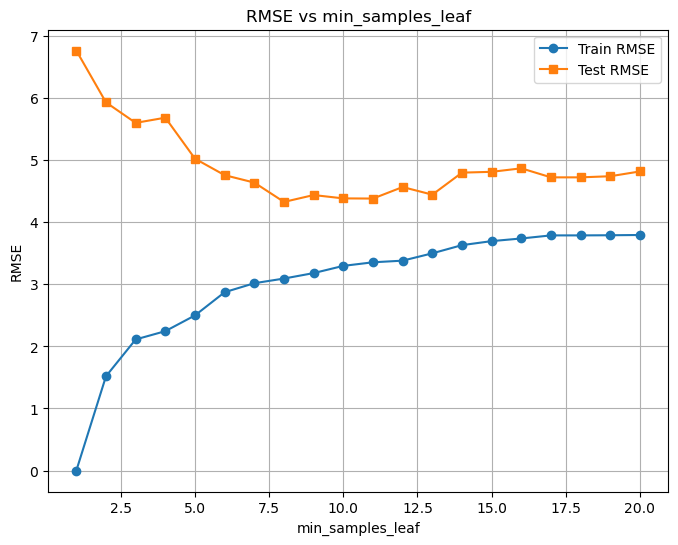

In [ ]:
leaf_values = range(1, 21)
rmse_train_leaf = []
rmse_test_leaf = []

for val in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=val, random_state=1)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train_leaf.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test_leaf.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot
plt.figure(figsize=(8,6))
plt.plot(leaf_values, rmse_train_leaf, marker='o', label='Train RMSE')
plt.plot(leaf_values, rmse_test_leaf, marker='s', label='Test RMSE')
plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE")
plt.title("RMSE vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()

As expected, increasing the minimum number of samples per leaf reduces model complexity, which increases the training error since the tree cannot overfit the training data as easily.It also initially decreases the test error, reaching an optimal point around $ min \_ samples \_ leaf ≈ 8 $. This is where the model best balances bias and variance. Beyond that point, test RMSE begins to rise again, indicating underfitting.

This trade-off clearly illustrates the bias-variance dilemma: small leaf sizes lead to low bias but high variance (overfitting), while larger leaf sizes increase bias and reduce variance (underfitting).


In [ ]:
leaves = range(1, 21)
leaf_scores = []

for l in leaves:
    model = DecisionTreeRegressor(min_samples_leaf=l, random_state=0)
    neg_rmse = cross_val_score(model, X_train, y_train, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5)
    leaf_scores.append(-np.mean(neg_rmse))

best_leaf = leaves[np.argmin(leaf_scores)]
print(f"Best min_samples_leaf: {best_leaf}, RMSE: {min(leaf_scores):.4f}")

Best min_samples_leaf: 8, RMSE: 4.5466


The CV shows that the optimal min sample is 8, which is near the one shown on the graph for this specific train-test split.

# BONUS SECTION: Ensemble methods

The main idea behind ensemble methods is to improve multiple poor models from the data at hand, by combining them in a clever way. We are thus going to use the regression tree as the basic models, as we have seen that it provides quite poor results, and try to improve by considering ensembles of trees.

## Bagging

In bagging, we generate multiple models *in parallel*, each of them working with a different dataset, sampled at random from the original training set (i.e. we do *bootstrapping*). When sampling, we consider a different random subset of features $P'<P$ for each dataset, and we sample with replacement $N$ data points.

When we do that with decision trees, we get the **random forests** algorithm.
A good tutorial can be found here
https://gormanalysis.com/random-forest-from-top-to-bottom/

In principle, also in the random forests algorithm we have many free parameters (max split, max depth, etc.) but we will let the algorithm find the best trees, without performing cross validation in this case.

**Your turn**

Implement Random Forest Regression on the ozone dataset. Look for sklearn.ensemble.RandomForestRegressor! Again, no worries if you do not manage at the first try, the scope of this exercise is to learn how to move in the sklearn environment.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

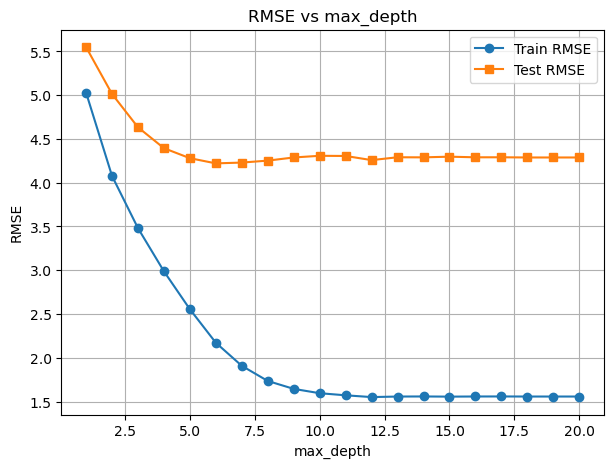

In [73]:
depth_range = range(1, 21)
rmse_train = []
rmse_test = []

for depth in depth_range:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(7,5))
plt.plot(depth_range, rmse_train, 'o-', label="Train RMSE")
plt.plot(depth_range, rmse_test, 's-', label="Test RMSE")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("RMSE vs max_depth")
plt.legend()
plt.grid(True)
plt.show()

Random Forest mitigates overfitting by averaging over many trees. The test performance is more stable and doesn’t degrade with increasing depth, unlike a single decision tree.

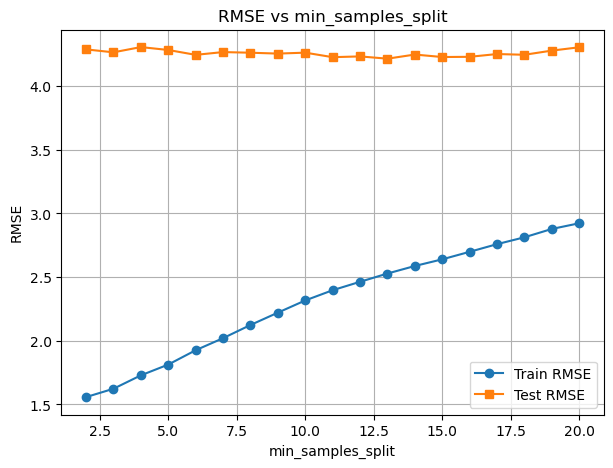

In [74]:
split_range = range(2, 21)
rmse_train_split = []
rmse_test_split = []

for split in split_range:
    model = RandomForestRegressor(min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train_split.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test_split.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(7,5))
plt.plot(split_range, rmse_train_split, 'o-', label="Train RMSE")
plt.plot(split_range, rmse_test_split, 's-', label="Test RMSE")
plt.xlabel("min_samples_split")
plt.ylabel("RMSE")
plt.title("RMSE vs min_samples_split")
plt.legend()
plt.grid(True)
plt.show()


Random Forest is more stable to hyperparameter tuning due to ensemble averaging. A single tree is highly sensitive to how splits are made, while Random Forest leverages many trees to reduce variance.

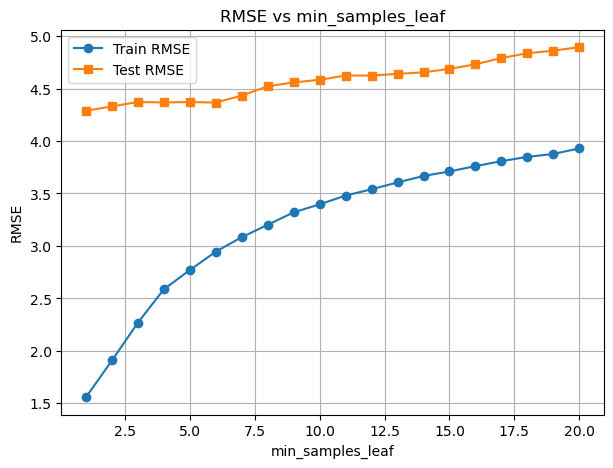

In [75]:
leaf_range = range(1, 21)
rmse_train_leaf = []
rmse_test_leaf = []

for leaf in leaf_range:
    model = RandomForestRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train_leaf.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test_leaf.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(7,5))
plt.plot(leaf_range, rmse_train_leaf, 'o-', label="Train RMSE")
plt.plot(leaf_range, rmse_test_leaf, 's-', label="Test RMSE")
plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE")
plt.title("RMSE vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()

Again, Random Forest smooths out the extremes by combining many trees. Overfitting is reduced even at low leaf thresholds, and performance is stable.